# S12 T01: Pipelines, grid search i text mining

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from scipy import sparse
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import sent_tokenize
from textblob import TextBlob

[nltk_data] Downloading package punkt to /home/rusi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/rusi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Exercici 1. Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

De l'Sprint07, carreguem les dades netes, sense nuls, amb l'històric de jugadors de la selecció espanyola de futbol absoluta masculina que han debutat (obtingudes a partir de la web bdfutbol.com). Recordem els noms de les columnes:

Sobrenom; Nom; Data Naixement; Lloc de Naixament; Província; País; Partits Jugats; Partits Titular; Partits Complets; Partits Suplent; Partits Substituït; Partits Convocats (sense jugar); Partits Guanyats; Partits Empetats; Partits Perduts; Minuts; Goles; Gols Penalt; Goles pròpia porta; Gols Encaixats; Targetes grogues; Targetes vermelles; Edat inicial; Edat final; Alçada; Pes

In [2]:
jugadors = pd.read_csv('//home/rusi/Escritorio/rubenIT/DataSources/jugadores00.csv')#importem i li assignem un nom de dataframe

In [3]:
#Imprimim les dades filtrades per comprovar la importació
print(jugadors.describe())
print(jugadors.head(10))
print(jugadors.tail(10))

               PJ          PT          PC          PS          PX          PG  \
count  654.000000  654.000000  654.000000  654.000000  654.000000  654.000000   
mean    14.155963   11.085627    8.006116    3.070336    3.056575    8.391437   
std     22.460518   19.330256   14.271486    5.229901    7.115855   15.330149   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    1.000000    1.000000    0.000000    0.000000    1.000000   
50%      5.000000    4.000000    3.000000    1.000000    1.000000    3.000000   
75%     16.000000   12.000000    9.000000    3.000000    3.000000    9.000000   
max    180.000000  161.000000  125.000000   42.000000   59.000000  131.000000   

               PE          PP           Min           G          GP  \
count  654.000000  654.000000    654.000000  654.000000  654.000000   
mean     3.333333    2.431193   1005.507645    1.960245    0.142202   
std      4.831199    3.607972   1669.924268    5.165109  

## Pipeline

**1) Building a prototype**
Construïm el prototipus, millorant les dades del dataframe. Prescindirem dels features "Apodo", "Nombre", "Fecha" i "Ciudad", i convertirem en números "Provincia" i "País".

**1.1) Encode the categorical variables.**

In [4]:
jugadors00=jugadors

In [5]:
# create an object of the OneHotEncoder
OHE = ce.OneHotEncoder(cols=["Provincia","País"],use_cat_names=True)
# encode the categorical variables
jugadors00 = OHE.fit_transform(jugadors00)

In [6]:
print(jugadors00.head())
print(jugadors00.info())

          Apodo                       Nombre       Fecha    Ciudad  \
0  Marcos Vales         Marcos Vales Illanes  05/04/1975  A Coruña   
1         Acuña              Juan Acuña Naya  13/02/1923  A Coruña   
2        Martín  José María Martín Rodríguez  25/04/1924  A Coruña   
3       Casilla     Francisco Casilla Cortés  02/10/1986   Alcover   
4  Juan Sánchez    Juan Ginés Sánchez Romero  15/05/1972    Aldaia   

   Provincia_A Coruña  Provincia_Tarragona  Provincia_Valencia  \
0                   1                    0                   0   
1                   1                    0                   0   
2                   1                    0                   0   
3                   0                    1                   0   
4                   0                    0                   1   

   Provincia_Barcelona  Provincia_Badajoz  Provincia_Huesca  ...  G  GP  GPP  \
0                    0                  0                 0  ...  0   0    0   
1                    0

El nou dataframe té 90 columnes, cosa que és massa nombrós pel nostre anàlisi. En comptes de fer-ho amb dummies, donarem valors númèrics a "Provincia" i "País" directament.

In [7]:
number=LabelEncoder()
jugadors=jugadors.drop(["Apodo","Nombre","Fecha","Ciudad"],axis=1)
jugadors["Provincia"]=number.fit_transform(jugadors["Provincia"].astype("str"))
jugadors["País"]=number.fit_transform(jugadors["País"].astype("str"))

In [8]:
print(jugadors.iloc[0:50,:])
print(jugadors.info())

    Provincia  País  PJ  PT  PC  PS  PX  PG  PE  PP  ...  G  GP  GPP  GE  TA  \
0           0     4   1   0   0   1   0   1   0   0  ...  0   0    0   0   0   
1           0     4   1   0   0   1   0   1   0   0  ...  0   0    0   1   0   
2           0     4   1   1   1   0   0   1   0   0  ...  0   0    0   0   0   
3          44     4   1   0   0   1   0   0   0   1  ...  0   0    0   1   0   
4          47     4   1   0   0   1   0   0   1   0  ...  0   0    0   0   0   
5           7     4   1   1   0   0   1   1   0   0  ...  0   0    0   0   0   
6          47     4   1   1   1   0   0   0   1   0  ...  0   0    0   0   0   
7           6     4   1   0   0   1   0   1   0   0  ...  0   0    0   0   0   
8          23     4   1   1   1   0   0   1   0   0  ...  0   0    0   0   1   
9          47     4   1   0   0   1   0   1   0   0  ...  0   0    0   0   0   
10          8     4   1   1   1   0   0   1   0   0  ...  0   0    0   0   0   
11         34     4   1   0   0   1   0 

**1.2) Scale data**

Podem escalar totes les columnes (entre 0 i 1), excepte "Peso", que el normalitzem (mitjana=0 i desviació=1). "Altura" és el target i no el tractem.

In [9]:
#Estandarització i eliminació target "Altura"
jugadors01 = jugadors.drop(["Provincia","País","Peso","Altura"], axis=1)
jugadors01_norm = (jugadors01-jugadors01.min())/(jugadors01.max()-jugadors01.min())
#jugadors01_norm = jugadors.drop(["Altura"], axis=1)

In [10]:
print(jugadors01_norm.head())
print(jugadors01_norm.info())

    PJ        PT     PC       PS   PX        PG        PE        PP       Min  \
0  0.0  0.000000  0.000  0.02381  0.0  0.007634  0.000000  0.000000  0.000000   
1  0.0  0.000000  0.000  0.02381  0.0  0.007634  0.000000  0.000000  0.001094   
2  0.0  0.006211  0.008  0.00000  0.0  0.007634  0.000000  0.000000  0.006493   
3  0.0  0.000000  0.000  0.02381  0.0  0.000000  0.000000  0.043478  0.000875   
4  0.0  0.000000  0.000  0.02381  0.0  0.000000  0.030303  0.000000  0.000802   

     G   GP  GPP    GE   TA   TR        EI        EF  
0  0.0  0.0  0.0  0.00  0.0  0.0  0.352941  0.315789  
1  0.0  0.0  0.0  0.01  0.0  0.0  0.058824  0.052632  
2  0.0  0.0  0.0  0.00  0.0  0.0  0.647059  0.578947  
3  0.0  0.0  0.0  0.01  0.0  0.0  0.647059  0.578947  
4  0.0  0.0  0.0  0.00  0.0  0.0  0.529412  0.473684  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0  

In [11]:
#Normalització
jugadors02=jugadors.loc[:,["Provincia","País","Peso"]]
ss = StandardScaler()
jugadors03 = ss.fit_transform(jugadors02.to_numpy())
jugadors03 = pd.DataFrame(jugadors03, columns=["Provincia","País","Peso"])

In [12]:
print(jugadors03.head())
print(jugadors03.info())

   Provincia      País      Peso
0  -1.524230 -0.070183  0.540207
1  -1.524230 -0.070183  2.466955
2  -1.524230 -0.070183  0.014730
3   1.476060 -0.070183  1.591161
4   1.680626 -0.070183 -0.335587
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Provincia  654 non-null    float64
 1   País       654 non-null    float64
 2   Peso       654 non-null    float64
dtypes: float64(3)
memory usage: 15.5 KB
None


In [13]:
jugadors04 = pd.concat((jugadors01_norm,jugadors03.loc[:,["Provincia","País","Peso"]]), 1)
jugadors04= pd.concat((jugadors04,jugadors.loc[:,"Altura"]), 1)

/tmp/ipykernel_42366/669182810.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  jugadors04 = pd.concat((jugadors01_norm,jugadors03.loc[:,["Provincia","País","Peso"]]), 1)
/tmp/ipykernel_42366/669182810.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  jugadors04= pd.concat((jugadors04,jugadors.loc[:,"Altura"]), 1)


In [14]:
print(jugadors04.head())
print(jugadors04.info())

    PJ        PT     PC       PS   PX        PG        PE        PP       Min  \
0  0.0  0.000000  0.000  0.02381  0.0  0.007634  0.000000  0.000000  0.000000   
1  0.0  0.000000  0.000  0.02381  0.0  0.007634  0.000000  0.000000  0.001094   
2  0.0  0.006211  0.008  0.00000  0.0  0.007634  0.000000  0.000000  0.006493   
3  0.0  0.000000  0.000  0.02381  0.0  0.000000  0.000000  0.043478  0.000875   
4  0.0  0.000000  0.000  0.02381  0.0  0.000000  0.030303  0.000000  0.000802   

     G  ...  GPP    GE   TA   TR        EI        EF  Provincia      País  \
0  0.0  ...  0.0  0.00  0.0  0.0  0.352941  0.315789  -1.524230 -0.070183   
1  0.0  ...  0.0  0.01  0.0  0.0  0.058824  0.052632  -1.524230 -0.070183   
2  0.0  ...  0.0  0.00  0.0  0.0  0.647059  0.578947  -1.524230 -0.070183   
3  0.0  ...  0.0  0.01  0.0  0.0  0.647059  0.578947   1.476060 -0.070183   
4  0.0  ...  0.0  0.00  0.0  0.0  0.529412  0.473684   1.680626 -0.070183   

       Peso  Altura  
0  0.540207   181.0  
1  2.4

**1.3) Model building**

Fem servir el model predictiu de regressió Random Forest, i trobem el RMSE (Root Mean Squared Error).

In [15]:
X = jugadors04.drop(columns=["Altura"])
y = jugadors04["Altura"]

# randomly split the data
X, test_X, y, test_y = train_test_split(X,y,test_size=0.3,random_state=42)

# shape of train and test splits
X.shape, test_X.shape, y.shape, test_y.shape

((457, 20), (197, 20), (457,), (197,))

In [16]:
# create an object of the RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(X, y)

# predict the target on train and test data
predict_train = model_RFR.predict(X)
predict_test = model_RFR.predict(test_X)

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', mean_squared_error(y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  1.6242631713439897
RMSE on test data:  3.6081435794826793


**1.4) Feature Importance**

Veiem quina és la importància de cada un dels atributs per predir el target "Altura".

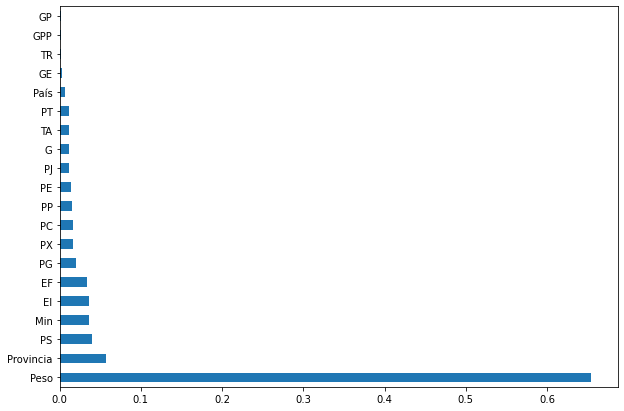

In [17]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind='barh');

Amb 6 features arribaríem a prop del 80% del total d'importància. Fixem aquesta dada i comparem el RMSE per contrastar la millora amb aquesta reducció.

In [18]:
X = jugadors04.loc[:,["Peso","Provincia","PS","EF","EI","Min"]]
y = jugadors04["Altura"]

# randomly split the data
X, test_X, y, test_y = train_test_split(X,y,test_size=0.3,random_state=42)

# shape of train and test splits
X.shape, test_X.shape, y.shape, test_y.shape

((457, 6), (197, 6), (457,), (197,))

In [19]:
# create an object of the RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(X, y)

# predict the target on train and test data
predict_train = model_RFR.predict(X)
predict_test = model_RFR.predict(test_X)

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', mean_squared_error(y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  1.660670329283194
RMSE on test data:  3.690543837014724


El model amb la reducció de ***features*** puja molt lleugerament el RMSE, així que aprovem el nou dataframe per aplicar-ho en el pipeline (1.624 vs 1.660 en el train, i 3.608 vs 3.690 en el test).

**1.5) Identify features to build the Machine Learning pipeline**

In [20]:
jugadors05=jugadors04.loc[:,["Altura","Peso","Provincia","PS","EF","EI","Min"]]

In [21]:
print(jugadors05.head())
print(jugadors05.info())

   Altura      Peso  Provincia       PS        EF        EI       Min
0   181.0  0.540207  -1.524230  0.02381  0.315789  0.352941  0.000000
1   179.0  2.466955  -1.524230  0.02381  0.052632  0.058824  0.001094
2   176.0  0.014730  -1.524230  0.00000  0.578947  0.647059  0.006493
3   192.0  1.591161   1.476060  0.02381  0.578947  0.647059  0.000875
4   173.0 -0.335587   1.680626  0.02381  0.473684  0.529412  0.000802
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Altura     654 non-null    float64
 1   Peso       654 non-null    float64
 2   Provincia  654 non-null    float64
 3   PS         654 non-null    float64
 4   EF         654 non-null    float64
 5   EI         654 non-null    float64
 6   Min        654 non-null    float64
dtypes: float64(7)
memory usage: 35.9 KB
None


**2) Pipeline design**

Hem identificat els següents passos de preprocessat per crear el nostre model de pipeline:
1)Drop columns.
2)Transform column (labelencoder).
3)Scale data.
4)Normalització.

In [22]:
jugadors = pd.read_csv('//home/rusi/Escritorio/rubenIT/DataSources/jugadores00.csv')#importem i li assignem un nom de dataframe

In [23]:
# seperate the independent and target variables
X02 = jugadors.drop(columns=["Altura"])
y02 = jugadors["Altura"]

In [24]:
train_x, test_x, train_y, test_y = train_test_split(X02, y02,test_size=0.3,random_state=42)

In [25]:
numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

numeric_preprocessor02 = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("normalizer", Normalizer()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        (
            "imputation_constant",
            SimpleImputer(fill_value="missing", strategy="constant"),
        ),
        ("ordinal_encoder", OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=1000)),
        ("normalitza",StandardScaler()),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("drop_columns", "drop", ["Apodo","Nombre","Fecha","Ciudad",
                                  "PX","PG", "PE","PP",
                                  "G", "GP", "GPP","GE", "TA", "TR",
                                  "Provincia","País"]),
        ("categorical", categorical_preprocessor, ["Provincia","País"]),
        ("numerical_standardize", numeric_preprocessor, ["Peso"]),
        ("numerical_normalizer", numeric_preprocessor02,["PS","Min","EI", "EF"]),
    ]
)

pipe = make_pipeline(preprocessor, RandomForestRegressor(max_depth=10,random_state=42))
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['Apodo', 'Nombre', 'Fecha',
                                                   'Ciudad', 'PX', 'PG', 'PE',
                                                   'PP', 'G', 'GP', 'GPP', 'GE',
                                                   'TA', 'TR', 'Provincia',
                                                   'País']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ordinal_encoder',
                                                                

In [26]:
# fit the pipeline with the training data
pipe.fit(train_x,train_y)
# predict target values on the training data
pipe.predict(test_x)

array([175.70934259, 182.62275806, 184.61037535, 180.46492238,
       170.18388473, 181.04930736, 175.30013095, 170.73893078,
       170.73826255, 178.22134329, 172.7170088 , 172.96667349,
       176.73625134, 182.16222018, 176.70949405, 172.55355411,
       171.28748551, 175.18344977, 181.37762616, 171.78751732,
       183.39931668, 181.16247835, 181.79668817, 181.33066089,
       174.56070859, 175.37616553, 178.7142957 , 185.27348798,
       182.16330118, 181.04783697, 181.34951104, 179.71060396,
       173.97952544, 180.85123427, 178.48788979, 181.5993148 ,
       183.22544473, 174.74031947, 170.66501242, 178.46949287,
       169.65351367, 170.53061029, 172.018475  , 188.76316767,
       177.00195735, 180.57387038, 181.47389081, 178.38415521,
       174.96053548, 177.10657937, 176.16495238, 171.65366041,
       171.07559207, 171.02685326, 182.18522598, 169.45631047,
       182.65871301, 170.53725973, 175.76928863, 183.95496336,
       175.83548135, 177.96691955, 174.41996766, 171.17

In [27]:
# read the test data
test_data = jugadors = pd.read_csv('//home/rusi/Escritorio/rubenIT/DataSources/jugadores00.csv')#importem i li assignem un nom de dataframe
predict_test = pipe.predict(test_x)

In [35]:
print("Mitja train_y: ",np.mean(train_y))
print("Mitja test_y: ",np.mean(test_y))
print("Mitja predict_train: ",np.mean(predict_train))
print("Mitja predict_test: ",np.mean(predict_test))
print("Mitja Altura jugadors: ", np.mean(jugadors.Altura))

Mitja train_y:  177.50765864332604
Mitja test_y:  177.7969543147208
Mitja predict_train:  177.5076879073611
Mitja predict_test:  177.81352830461853
Mitja Altura jugadors:  177.5948012232416


In [36]:
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ', mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  2.7631782507651415
RMSE on test data:  3.654590587410196


Com podem veure, el valor "Altura" s'apropa molt a la mitjana dels valors d'entrenament i de tota la sèrie, 177.507 vs 177.598 vs 177.595. La predicció amb un 30% de les dades per fer el testeig, dona un valor de 177.853, molt a prop dels valors mitjans. Podem afirmar que el resultat obtingut és força bo en aquest sentit.

En quant a l'error RMSE, incrementa notablement en el train (2.763 vs 1.660), i és molt semblant en el test (3.654 vs 3.690). Té la seva lògica, ja que a mesura que hi ha més dades, tindrem més dispersió que fomentarà un increment en el RMSE.

## Grid search

*Grid Search Parameter Tuning. Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.*

In [40]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_features': max_features,
               'randomforestregressor__max_depth': max_depth,
               'randomforestregressor__min_samples_split': min_samples_split,
               'randomforestregressor__min_samples_leaf': min_samples_leaf,
               'randomforestregressor__bootstrap': bootstrap}

In [41]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = pipe, param_distributions = random_grid, 
                               n_iter = 30, cv = 3,random_state=42, n_jobs = -1)

In [42]:
rf_random.fit(train_x, train_y)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('drop_columns',
                                                                               'drop',
                                                                               ['Apodo',
                                                                                'Nombre',
                                                                                'Fecha',
                                                                                'Ciudad',
                                                                                'PX',
                                                                                'PG',
                                                                                'PE',
                                                                                'PP',
                        

In [43]:
rf_random.best_params_

{'randomforestregressor__n_estimators': 1800,
 'randomforestregressor__min_samples_split': 10,
 'randomforestregressor__min_samples_leaf': 4,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_depth': 90,
 'randomforestregressor__bootstrap': True}

In [44]:
# Best estimator
best_random = rf_random.best_estimator_

#Predictions
predict_train = best_random.predict(train_x)
predict_test = best_random.predict(test_x)

# Root Mean Squared Error on train data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ', mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  2.7631782507651415
RMSE on test data:  3.654590587410196


L'error RMSE es manté en el mateix valor. Això podria ser degut a què les mostres són escasses, i que no té sentit aplicar una millora d'aquest tipus.

## Exercici 2. Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

De la següent pàgina web, descarreguem un capítol del llibre de Jane Austin "Sense and Sensibility":

https://www.fulltextarchive.com/

In [45]:
# Llegir llibre
book_file = open('//home/rusi/Escritorio/rubenIT/DataSources/sense_and_sensibility.txt', "r")
book = book_file.read()

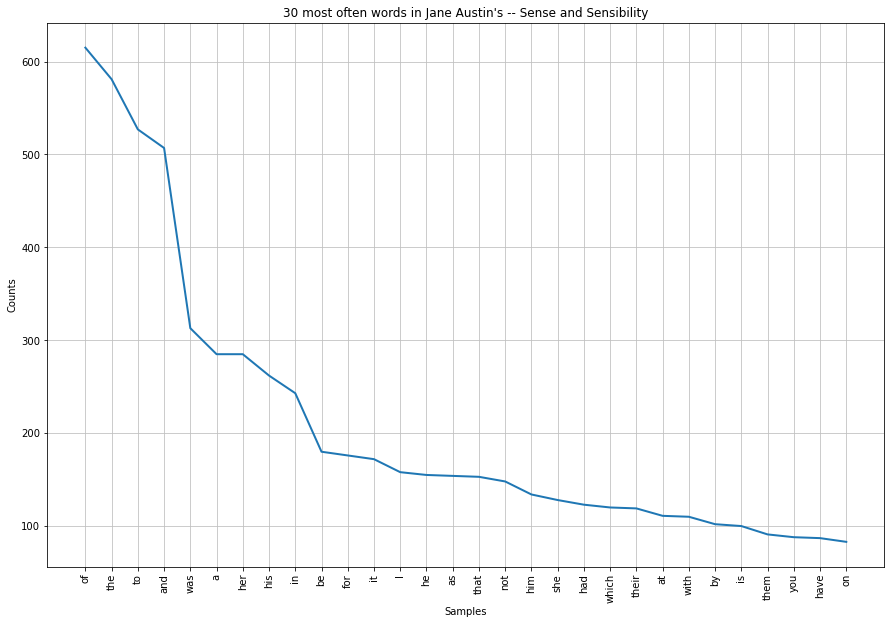

In [65]:
# Word freq
tokenized_book = word_tokenize(book)
# Remove punctuation
tokenized_book= [word for word in tokenized_book if word.isalnum()]
# Freq
fdist = FreqDist(tokenized_book)
# 30 most common words
fig, ax1 = plt.subplots(figsize = (15, 10))
fdist.plot(30,cumulative=False,
           title="30 most often words in Jane Austin's -- Sense and Sensibility")
plt.show()

## Exercici 3. Treu les stopwords i realitza stemming al teu conjunt de dades.

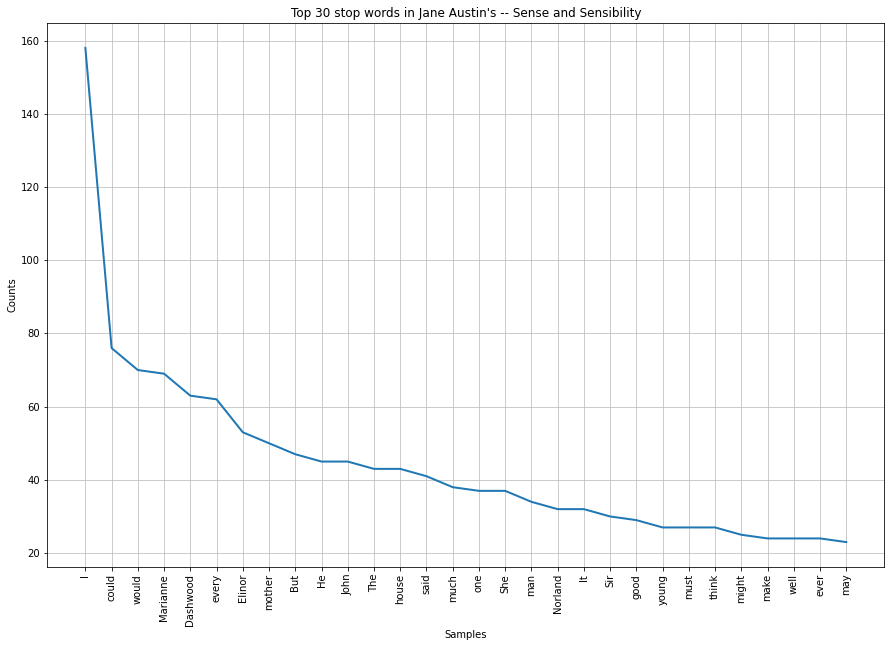

In [75]:
# Stop words list
stop_words=set(stopwords.words("english"))

# Filter
filtered_book=[]
for w in tokenized_book:
    if w not in stop_words:
        filtered_book.append(w)

# Word freq
fdist = FreqDist(filtered_book)

# 30 most common words
fig, ax1 = plt.subplots(figsize = (15, 10))
fdist.plot(30,cumulative=False,title="Top 30 stop words in Jane Austin's -- Sense and Sensibility")
plt.show()

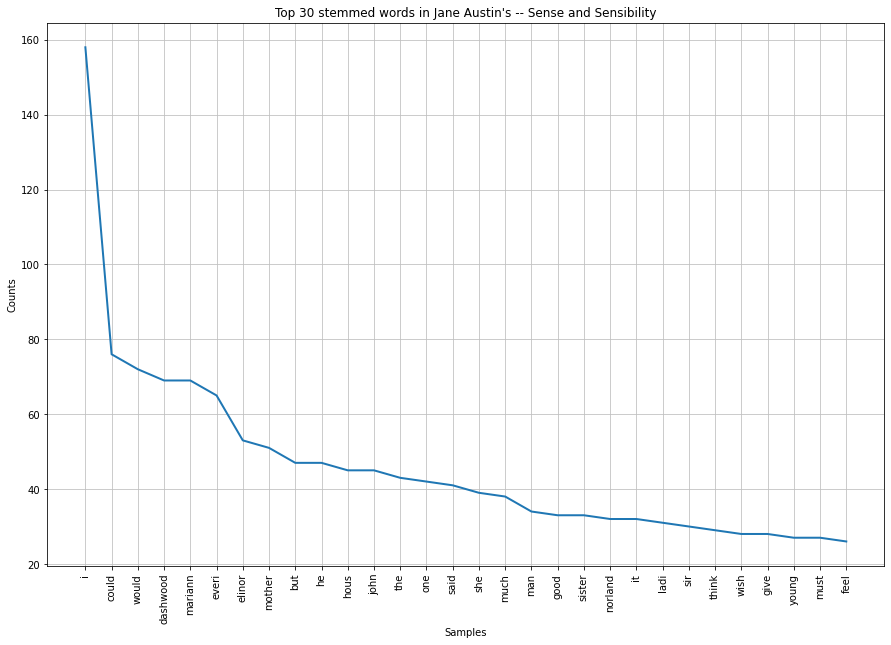

In [74]:
# Stemming
ps = PorterStemmer()

stemmed_book=[]
for w in filtered_book:
    stemmed_book.append(ps.stem(w))

# Word freq
fdist = FreqDist(stemmed_book)

# 30 most common words
fig, ax1 = plt.subplots(figsize = (15, 10))
fdist.plot(30,cumulative=False,title="Top 30 stemmed words in Jane Austin's -- Sense and Sensibility")
plt.show()

## Exercici 3. Realitza sentiment analysis al teu conjunt de dades

**Sentiment Analysis**

*The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.*

In [79]:
# Polarity of the text
book_sent = TextBlob(book)
book_sent.sentiment

Sentiment(polarity=0.15604552058239224, subjectivity=0.535295224185392)

Com es tracta d'una novel·la, la quantitat de paraules emprades són molt variades, i no demostren una inclinació cap a una determinada sensació o sentiment. Per aquest motiu els paràmteres de neutralitat i subjectivitat es troben en un punt intermig.